#### Projet image



In [1]:
from fonctions import *

1) Filtrage

Pour filtrer l'image d'origine nous avons choisi d'utiliser un filtre anisotropique

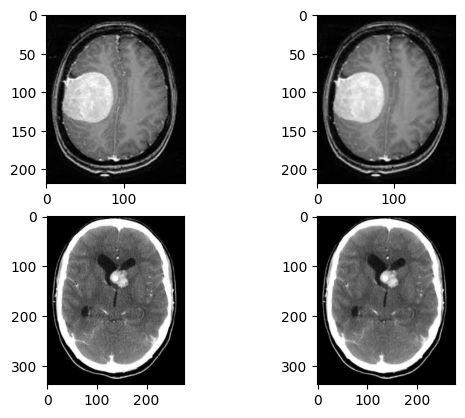

In [2]:
im1 = image_to_arr("data/yes/Y1.jpg")
im2 = image_to_arr("data/no/N1.JPG")

im1_filtered = anisodiff(im1)
im1filtered = anisodiff(im1_filtered)
im1_filtered = anisodiff(im1_filtered)

im2_filtered = anisodiff(im2)
im2filtered = anisodiff(im2_filtered)
im2_filtered = anisodiff(im2_filtered)


_, ax = plt.subplots(2, 2)
ax[0, 0].imshow(im1, cmap = "grey")
ax[0, 1].imshow(im1_filtered, cmap = "grey")
ax[1, 0].imshow(im2, cmap = "grey")
ax[1, 1].imshow(im2_filtered, cmap = "grey")
plt.show()

2) "Skull Stripping"

Isoler le cerveau en enlevant le crane et le fond de l'image

a) Seuillage par entropie croisée

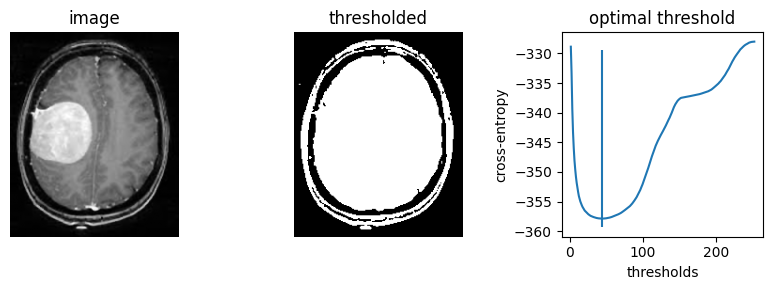

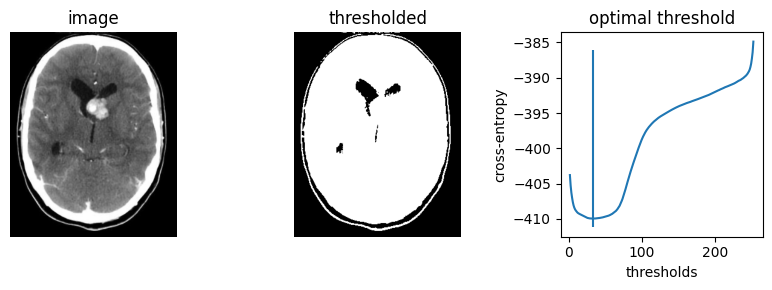

In [3]:


im1_th = cross_entropy_thresholding(im1_filtered, show = True)
im1_th[im1_th==True] = 255
im1_th[im1_th==False] = 0
im1_th = im1_th.astype(np.uint8)

im2_th = cross_entropy_thresholding(im2_filtered, show = True)
im2_th[im2_th==True] = 255
im2_th[im2_th==False] = 0
im2_th = im2_th.astype(np.uint8)

b) Fitting d'une ellipse

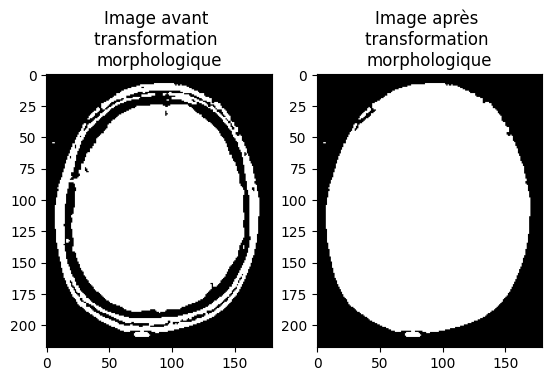

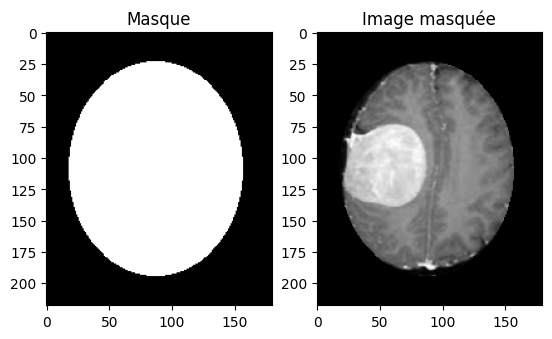

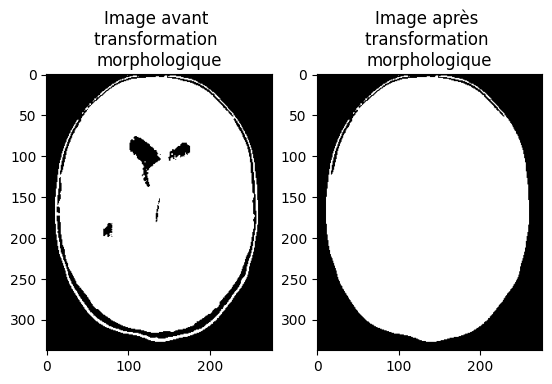

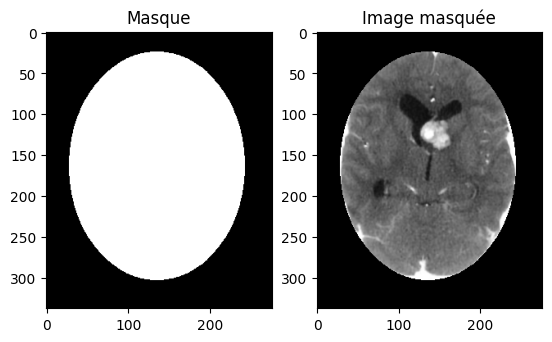

In [4]:


im1_mask = skull_stripping(im1_th,  show = True)
im1_stripped = im1_filtered
im1_stripped[im1_mask == 0] = 0
_, ax = plt.subplots(1, 2)
ax[0].imshow(im1_mask, cmap = "grey")
ax[0].set_title("Masque")
ax[1].imshow(im1_stripped, cmap = "grey")
ax[1].set_title("Image masquée")
plt.show()
        

im2_mask = skull_stripping(im2_th, show = True)
im2_stripped = im2_filtered
im2_stripped[im2_mask == 0] = 0
_, ax = plt.subplots(1, 2)
ax[0].imshow(im2_mask, cmap = "grey")
ax[0].set_title("Masque")
ax[1].imshow(im2_stripped, cmap = "grey")
ax[1].set_title("Image masquée")
plt.show()
        
        

3) Segmentation (seuillage mutiple avec Otsu)

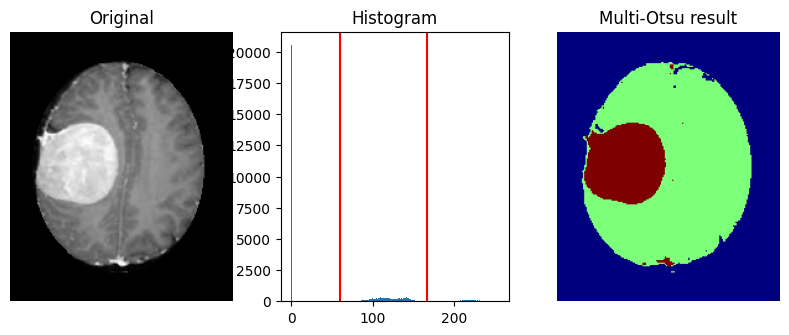

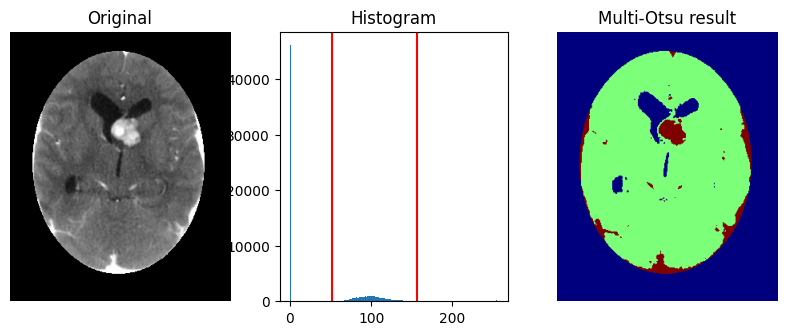

In [5]:


im1_mult_th = multi_otsu(im1_stripped, show = True)
im2_mult_th = multi_otsu(im2_stripped, show = True)

4) Classification

a) Fonction coût

Pour classifier les images, il faut trouver en quoi une image de cerveau avec tumeur se différencie d'un cerveau sans tumeur.

Notre idée est quantifié la symétrie du cerveau. En effet un cerveau contenant un tumeur ne seras pas symétrique, alors qu'un cerveau ne contenant pas de tumeur le sera.

Nous avons donc comparer les histogramme des deux cotés du cerveau, et effectuer une distance euclidienne dessus.

Plus la fonction cout est basse plus le cerveau est "symétrique".

Cette méthode a bien évidamment ses limites.

In [6]:
print("Symétrie de l'image 1 : ")
print(cout(im1_mult_th))
print("Symétrie de l'image 2 : ")
print(cout(im2_mult_th))

Symétrie de l'image 1 : 
205.0
Symétrie de l'image 2 : 
165.0


b) Approximation de la fonction densité de probabilité 

Nous avons choisi d'approximer la fonction densité de probabilité de notre distribution, avec la méthode kde avec un noyau gaussien.


In [7]:

tumeur, non_tumeur = data_from_rep()
tum_train, tum_test, tum_valid, non_tum_train, non_tum_test, non_tum_valid = train_val_split(tumeur, non_tumeur)

tum_train = extraction(tum_train, show = False)
non_tum_train = extraction(non_tum_train, show = False)

tum_test = extraction(tum_test, show = False)
non_tum_test = extraction(non_tum_test, show = False)

tum_valid = extraction(tum_valid, show = False)
non_tum_valid = extraction(non_tum_valid, show = False)

Contours too small
Contours too small
Contours too small
Contours too small
Contours too small
Contours too small
Contours too small
Contours too small
Contours too small


C:\Users\szopk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\filters\thresholding.py:638: RuntimeWarning: divide by zero encountered in log
  nu = -m1a * np.log(mua) - m1b * np.log(mub)
C:\Users\szopk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\filters\thresholding.py:638: RuntimeWarning: invalid value encountered in scalar multiply
  nu = -m1a * np.log(mua) - m1b * np.log(mub)


Contours too small


In [8]:
"""bd = 1000

kde1, kde2 = kdes(tum_train, non_tum_train, bd)
cm = matrice_conf(kde1, kde2, tum_test, non_tum_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()"""

'bd = 1000\n\nkde1, kde2 = kdes(tum_train, non_tum_train, bd)\ncm = matrice_conf(kde1, kde2, tum_test, non_tum_test)\n\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm)\ndisp.plot()'

In [9]:
X_train, y_train = nouv_taille(tum_train, non_tum_train)
X_test, y_test = nouv_taille(tum_test, non_tum_test)
X_valid, y_valid = nouv_taille(tum_valid, non_tum_valid)


-1
29700
(83,)
41
29700
29700
(42,)
21
29700
29700
(43,)
21


In [14]:
clf = classif(X_train, y_train)
y_pred = pred(clf, X_test)


0.6904761904761905


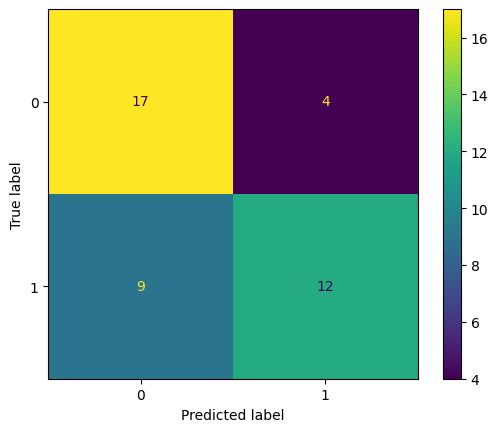

In [16]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(accuracy_score(y_test, y_pred))